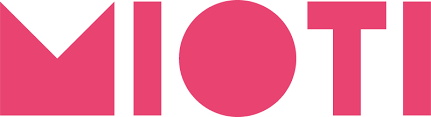
<center style="color:#888">Módulo Advanced Data Science<br/>Natural Language Processing</center>

# S2. Challenge. Parseo de formularios con RegEx

En muchas aplicaciones de NLP, es necesario la estructuración de información que viene de forma textual. En el mejor de los casos, esta información ya vendrá semi-estructurada, por ejemplo, siguiente la plantilla de un formulario.

Esto simplifica mucho la tarea, pero no la resuelve al 100%, ya que puede darse el caso de que hay más de un formulario posible (distintas plantillas), así como que nos interesa poder acceder a cada uno de los campos por separado.

## Calentamiento

Para cada uno de los ejercicios siguientes, debes obtener al menos una solución basada en regex. 
Es decir, tienes que encontrar tanto el patrón de regex como una función a utilizar de la librería `re`.

**Opcionalmente, puedes añadir alguna solución que sólo use métodos de strings de Python y Python puro.**

In [1]:
import re

### Ejercicio 1

Extraiga el nombre de dominio de estas URL simples, que siempre comienzan con "https" y terminan con ".com".

**Pista: el metacaracter que coincide con todos los caracteres `.` es útil.**

In [2]:
texto1 = 'https://www.kaggle.com https://www.google.com https://www.wikipedia.com'
print(texto1)

https://www.kaggle.com https://www.google.com https://www.wikipedia.com


In [3]:
### ESCRIBE AQUÍ TU SOLUCIÓN
patron = re.compile(r"(?<=https:\/\/www.).+?(?=.com)")
s = patron.findall(texto1)
print('Los dominios extraidos son : ',s)

Los dominios extraidos son :  ['kaggle', 'google', 'wikipedia']


### Ejercicio 2

Escribe un patrón que devuelva números que no contengan ceros ni unos.
        
**Sugerencia: el caracter especial de límite de palabra `\b` es útil.**
    

In [4]:
texto2 = '123, 012410, 01010, , 000, 111, 3495873, 3, not a number!, ...!@$,.'
print(texto2)

123, 012410, 01010, , 000, 111, 3495873, 3, not a number!, ...!@$,.


In [5]:
### ESCRIBE AQUÍ TU SOLUCIÓN
patron = re.compile(r"\b[2-9]+\b")
s = patron.findall(texto2)
print(s)

['3495873', '3']


### Ejercicio 3

Cuente el número de palabras en esta oración con al menos cinco caracteres.

In [6]:
texto3 = 'Cuenta el número de palabras en esta frase con al menos cinco caracteres.'
print(texto3)

Cuenta el número de palabras en esta frase con al menos cinco caracteres.


In [7]:
### ESCRIBE AQUÍ TU SOLUCIÓN
patron = re.compile(r"[\w]{5,}")
s = patron.findall(texto3)
print('El número de palabras con al menos 5 caracteres son :', len(s))

El número de palabras con al menos 5 caracteres son : 7


### Ejercicio 4

Soluciona los extraños problemas de espacios en blanco con la oración del problema.

In [8]:
texto4 = "Weird whitespace   issues\t\t\t can be\n\n annoying."
print(texto4)

Weird whitespace   issues			 can be

 annoying.


In [9]:
### ESCRIBE AQUÍ TU SOLUCIÓN
patron = re.compile(r"\S+\b")
s = patron.findall(texto4)
print(' '.join(s))

Weird whitespace issues can be annoying


### Ejercicio 5 

Identifica todas las palabras que parecen nombres en la oración. En otras palabras, las que están en mayúscula pero no son la primera palabra de la oración.

In [10]:
texto5 = "Esto no es un nombre, pero Pedro si. También lo es Susana. Juan debería perderse por estar al principio de la frase."
print(texto5)

Esto no es un nombre, pero Pedro si. También lo es Susana. Juan debería perderse por estar al principio de la frase.


In [11]:
### ESCRIBE AQUÍ TU SOLUCIÓN
patron = re.compile(r"(?<!^)(?<!\.\s)\b[A-Z][a-z]+\b")
s = patron.findall(texto5)
print(s)

['Pedro', 'Susana']


## Uso de regex en Pandas

En este challenge vamos a poner en prácica los conocimientos de tratamiento de strings en Python, así como como los patrones de RegEx y su implementación sobre un conjunto de formularios a través de la archiconocida librería `pandas`.
Aunque no lo hayamos cubierto en el worksheet, la librería `pandas` tiene una gran variedad de métodos que permite aplicar RegEx a cadenas de caracteres, tanto para validar patrones, como para extraer información.


Los objetos `pd.Series` y `pd.Index` están equipados con un conjunto de métodos de procesamiento de strings que facilitan la operación en cada elemento del conjunto. Quizás lo más importante es que estos métodos excluyen automáticamente los valores nulos o NaN. 
Se accede a ellos a través del atributo `str` y generalmente tienen nombres que coinciden con los métodos de strings que vienen de serie en Python (`lower()`, `upper()`, `strip()`, `count()`, `split()`,`replace()`, etc).


Estos se suelen invocar con la estructura `pd.Series.str.method()`. Algunas son:

|   Methods  |                                                           Description                                                          |
|:----------:|:------------------------------------------------------------------------------------------------------------------------------:|
| `count()`    | Cuenta el número de ocurrencias del patrón de regex en la string                                                                |
| `replace()`  | Reemplaza la string o patrón de regex con un valor alternativo                                                                    |
| `contains()` | Comprueba si la string o regex aparece en cualquier lugar de cada string. Equivale a utilizar `re.search()` sobre cada entrada y devolver un `bool` |
| `match()`    | Comprueba si cada string coincide con el patrón empezando desde el inicio de cada una. Equivale a utilizar `re.match()` sobre cada entrada y devolver un `bool` |
| `fullmatch()`| Comprueba si hay una coincidencia completa de cada string con el patrón. Equivale a utilizar `re.fullmatch()` sobre cada entrada y devolver un `bool` |
| `extract()`  | Extrae los grupos de captura de la regex como columnas de un nuevo `pd.DataFrame` de la **primera coincidencia**. Si no encuentra el patrón, devuelve `NaN`. Equivale a llamar a `re.search()` en cada elemento.   |
| `extractall()`  | Como el anterior, pero devolviendo **todas las coincidencias** encontradas en cada string. Devuelve un `pd.DataFrame` con `MultiIndex`. Llama a `re.findall()` en cada elemento, devolviendo un `pd.DataFrame` con una fila por cada coincidencia, y una columna por cada grupo de captura.|
| `findall()`  | Devuelve todas las strings que coincidan con la regex. Equivalente a aplicar `re.findall()` a todos los elementos           |
| `split()`    | Equivalente a `str.split()`, pero acepta además regex|



La distinción entre `match()`, `fullmatch()` y `contains()` es el nivel de precisión: `fullmatch()` comprueba si toda la cadena coincide con la expresión regular; `match()` prueba si hay una coincidencia de la expresión regular que comienza en el primer carácter de la cadena; y `contains()` prueba si hay una coincidencia de la expresión regular en cualquier posición dentro de la cadena.

Una lista exhaustiva de los métodos con el antecesor `str` en `pandas` se puede encontrar en su [documentación](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#method-summary).

## Dataset: Economía occidental desde 1785 hasta 1974

En el dataset [NBER Macrohistory Database Western economic history data spanning 1785-1974](https://www.kaggle.com/sohier/nber-macrohistory-database/), hay un archivo con la documentación, que sirve de índice de todo el contenido de este dataset.

En la columna `"description"` podemos encontrar un título, así como un range de fechas del período involucrado. Queremos extraer, para cada entrada, este rango de fechas, así como el inicio y el fin, y añadir esta información como tres columnas en el dataframe:
* `"fecha_ini"`: fecha inicial en formato `Int64`
* `"fecha_fin"`: fecha final en formato `Int64`
* `"fecha_rango"`: rango de fechas en formato `str`

Para finalizar, dibuja un histograma con la duración (en años) del período tratado por cada documento del dataset.

**Ayuda:** Puedes utilizar los métodos `str.findall()` o `str.extractall()` de pandas, con un patrón de regex para detectar los rangos de fechas.

**Ayuda:** `pandas` 1.0+ puede lidiar con NaNs en las columnas de tipo int, sólo tienes que convertir dicha columnas a tipo "Int64" con `df[col] = df[col].astype("Int64")`. Por defecto, los enteros con NaNs se guardan como `float`.

**Avanzado:** Cabe la posibilidad de que, en una misma entada, encontremos varios rangos de fecha. ¿Puedes detectar qué casos cumplen esto? Trata este caso de forma apropiada. Los campos`"fecha_ini"` y `"fecha_fin"` deben ser el menor/mayor año que aparezca en los rangos individuales. Y `"fecha_rango"` una string en la que los rangos se separen por comas.

In [12]:
import re
import pandas as pd
from pathlib import Path
def load_dataset(folder:str = "./data"):
    folder = Path(folder)
    df = pd.read_csv(folder/"documentation.csv")
    return df

df_economy = load_dataset()
df_economy.head()

,file_name,description,documentation,chapter
0,a01005a,U.S. Index of Crop Production 1862-1930,VAR 0094 01005 CROP RO 1R 862-930 ...,1
1,a01005aa,"U.S. Index of Crop Producton, Twelve Important...",VAR 0096 01005A TWELVE 1R 866-940 ...,1
2,a01005b,U.S. Index of Total Crop Production 1866-1950,VAR 0095 01005 CROP RO 1R 866-950 ...,1
3,a01006,Great Britain Index of Crop Production 1866-1947,VAR 0099 01006 IND ROP 1R 866-947 ...,1
4,a01007a,U.S. Index of Manufacturing Production 1863-1930,VAR 0253 01007 IN MANU 1A 863-830 ...,1


In [13]:
import pprint
pprint.pprint(df_economy["description"].sample(10, random_state = 0).to_list())

['U.S. Revenue and Non-Revenue Net Ton-Miles of Freight Hauled '
 '04/1907-06/1914; 04/1916-07/1942; 10/1942-08/1943',
 'Great Britain Index of Business Activity 01/1920-04/1935',
 'U.S. Contracts For Commercial Buildings, Value, F. W. Dodge Corp. '
 '01/1956-12/1963',
 'U.S. Index of Production Of Manufactures, Seasonally Adjusted '
 '01/1919-12/1940',
 'U.S. Borrowings At Federal Reserve Banks, Member Banks Outside New York City '
 '01/1944-04/1949',
 'U.S. Demand Deposits, All Commercial Banks 01/1947-05/1968',
 'U.S. Approximate Number of Acres Subdivided Within 1931 City Limits Of '
 'Chicago 1830-1932',
 'U.S. Net Military Construction, Kuznets (Constant Dollars) 1914-55',
 'U.S. Wholesale Price of Carbonate Of Lead (White Lead, American, in Oil, '
 'Kegs) 01/1890-05/1944',
 "U.S. Manufacturers' Shipments, Machinery Except Electrical, Total "
 '01/1953-12/1965']


In [14]:
### ESCRIBE AQUÍ TU SOLUCIÓN
#Se hace una copia del df original para no estropearlo
contrato=df_economy.copy()
contrato.sample(5)

,file_name,description,documentation,chapter
2621,a09056a,"U.S. Changes Inother Assets, Large Manufacturi...",VAR 0020 09056 OTHERAS 1A 915-922 ...,9
1022,m02205c,U.S. New Private Housing Units Authorized By B...,VAR 0341 02205 PVT HSNG R 959-963 ...,2
2328,m08160,"U.S. Road Freight Service, Time Paid For But N...",VAR 0721 08160 BUT NOT 3R 926-940 ...,8
589,a02180a,"U.S. Private Nonfarm Residential Buildings, Va...",VAR 0308 02180 PVT RES R 915-946 ...,2
2618,a09054b,"U.S. Changes in Fixed Property Assets, Large M...",VAR 0019 09054 FIXEDAS 1A 921-943 ...,9


In [15]:
#Revisamos el dataframe
contrato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493 entries, 0 to 3492
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file_name      3493 non-null   object
 1   description    3492 non-null   object
 2   documentation  3493 non-null   object
 3   chapter        3493 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 109.3+ KB


In [16]:
#Vemos que hay un valor nulo en la descripción que pasamos a eliminar
contrato=contrato.dropna(axis=0).reset_index(drop=True)
contrato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3492 entries, 0 to 3491
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file_name      3492 non-null   object
 1   description    3492 non-null   object
 2   documentation  3492 non-null   object
 3   chapter        3492 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 109.2+ KB


* Aplicamos la primera regex para opbtener la mayor parte de las fechas que hay en los documentos.

In [17]:
contrato['fecha']=contrato['description'].str.findall(r'(\b[1-?][7-9]\d{1,2}-?\d{1,2}\b(?!\/))')

* Visualizamos como nos ha quedado la información en la columna fecha que es donde guardamos todos los años recogidos en cada uno de los documentos.

In [18]:
contrato['fecha']

0                               [1862, 1930]
1                               [1866, 1940]
2                               [1866, 1950]
3                               [1866, 1947]
4                               [1863, 1930]
                        ...                 
3487                            [1933, 1938]
3488                [1927, 1939, 1946, 1958]
3489    [1948, 1952, 1952, 1956, 1957, 1958]
3490    [1949, 1952, 1953, 1957, 1957, 1958]
3491                            [1947, 1958]
Name: fecha, Length: 3492, dtype: object

In [19]:
#Al aplicar las fórmulas al dataframe nos encontramos con que hay listas vacías en el campo fecha, pasamos
#a examinar esos registros
cont=-1
lista=[]
for i in contrato['fecha']:
    cont=cont+1
    if (len(i)==0 or (len(i)==1 and len(i[0])==4)):
        lista.append(cont)
lista

[89, 179, 462, 727, 1036, 1088, 1115, 1608, 2676, 3179, 3185]

* Al revisar esos registros vemos que: 
    * algunos tienen otro formato [89, 179, 462,3185].
    * otros no tienen fecha [727, 1036, 1088, 1115,1608]
    * y otros tienen erratas en sus fechas [2676, 3179]

* Mostramos el texto de los contratos

In [20]:
for i in lista:
    print('Indice : ', i ,'\n')
    print('Contrato:', str(contrato['description'].iloc[i]),'\n')

Indice :  89 

Contrato: U.S. Vacuum Cleaners . Floor , Shipments 1919/1-1942/1 

Indice :  179 

Contrato: U.S. Indexes of Physical Production 1884/01-1889/12 

Indice :  462 

Contrato: U.S. Vacuum Cleaners . Floor , Shipments 1919/1-1942/1 

Indice :  727 

Contrato: Value of Building Permits, Outside New York City, Dun & Bradstreet, Original Data 

Indice :  1036 

Contrato: U.S. Private Commercial, Industrial, and Public Utility Construction, BLS-Dept. of Commerce (Current Dollars) 

Indice :  1088 

Contrato: U.S. Revenue Per Freight Ton-Mile, Seven Railroads 

Indice :  1115 

Contrato: U.S. Revenue Per Freight Ton-Mile, Seven Railroads 

Indice :  1608 

Contrato: U.S. NBER Series: 05069 

Indice :  2676 

Contrato: U.S. Number of Business Failures, Manufacturing Companies With Liabilities Over One Hundred Thousand Dollars 01/1894008/1938 

Indice :  3179 

Contrato: France NBER Series: 14101 01/1895-021940 

Indice :  3185 

Contrato: U.K. NBER Series: 14107 10/1877/12/1914 



* Volvemos a reprocesar con otra regex los contratos que tienen otros formatos que no han sido detectados por la primera

In [21]:
contrato.loc[[89, 179,462,3185],'fecha']=contrato.loc[[89, 179, 462,3185],'description'].str.findall(r'(\b[1-?][7-9]\d{1,2}-?\d{1,2}\b(?!-))')

In [22]:
contrato.loc[[89, 179, 462,3185],'fecha']

89      [1919, 1942]
179     [1884, 1889]
462     [1919, 1942]
3185    [1877, 1914]
Name: fecha, dtype: object

* Pasamos a eliminar los registros que no tienen fecha o son fechas con erratas.

In [23]:
#Pasamos a eliminar esos registros ya que no nos dan información relevante
eliminar=[727, 1036, 1088, 1115, 1608,2676, 3179]
contrato=contrato.drop(eliminar,axis=0).reset_index(drop=True)

* Hemos extraido las fechas, sin embargo es necesario realizar un preprocesamiento a los resultados por los siguientes motivos:

    * La extracción puede ser una lista de un único valor como en este ejemplo [1919-33], en este caso hay que convertir ese valor en [1919,1933]
    
    * La extracción puede ser también de este tipo [1919-33,...,1939], en este caso el resultado final debería ser [1919,...,1939]
    
    * Otro caso sería este [1919,...,1920-33] donde tenemos que obtener [1919,...,1933]
    
    * Y por último una combinación de los dos anteriores [1919-20,...,1930-36] donde lo que buscamos es [1919,...,1936]

In [24]:
def fechas(fecha):
    #Para que en este tipo de fechas [1919-33] devuelva [1919,1933]
    if len(fecha)==1:
        if len(fecha[0])>4:
            aux=fecha[0][:2]+fecha[0][-2:]
            fecha=[fecha[0][:4]]
            fecha.append(aux)
    #Para que en este tipo de fechas [1826-68, 1872, 1912, 1920-35] devuelva el primer valor como [1826,1872,1912,1935]
    else:
        if len(fecha[0])>4:
            fecha[0]=fecha[0][:4]
        if len(fecha[-1])>4:
            fecha[-1]=fecha[-1][:2]+fecha[-1][-2:]
    fecha.sort()
    return fecha

In [25]:
#Se aplica la función
contrato['fecha']=contrato['fecha'].apply(fechas)

* Ahora pasamos a crear las filas de fecha inicial y final tomando el primer y último elemento de cada lista funciones de fechas

In [26]:
def ini(x):
    return x[0]
def fin(x):
    return x[len(x)-1]

In [27]:
#Ahora si aplicamos las fórmulas para obtener las fechas de inicio y final
contrato['fecha_ini']=contrato['fecha'].apply(ini)
contrato['fecha_fin']=contrato['fecha'].apply(fin)

In [28]:
#A continuación pasamos a crear el rango de fechas a través de las dos columnas generadas
contrato['fecha_rango']=contrato['fecha_ini']+"-"+contrato['fecha_fin']

In [29]:
#Eliminamos la columna fecha
contrato=contrato.drop('fecha',axis=1)

In [30]:
#Al revisar el dataframe vemos que los campos de fecha_ini y fin son de tipo objeto, los necesitamos como enteros
#para poder operar con ellos
contrato['fecha_ini']=pd.to_numeric(contrato['fecha_ini'])
contrato['fecha_fin']=pd.to_numeric(contrato['fecha_fin'])
contrato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3485 entries, 0 to 3484
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   file_name      3485 non-null   object
 1   description    3485 non-null   object
 2   documentation  3485 non-null   object
 3   chapter        3485 non-null   int64 
 4   fecha_ini      3485 non-null   int64 
 5   fecha_fin      3485 non-null   int64 
 6   fecha_rango    3485 non-null   object
dtypes: int64(3), object(4)
memory usage: 190.7+ KB


* Sacamos los años de duración de cada tratado

In [31]:
contrato['duracion']=contrato['fecha_fin']-contrato['fecha_ini']

In [32]:
#Vamos a echar un vistazo de los resultados obtenidos
contrato.sample(5)

,file_name,description,documentation,chapter,fecha_ini,fecha_fin,fecha_rango,duracion
247,m01095b,U.S. Knit Underwear Production 01/1930-09/1933,VAR 0439 01095 KNITUND 3R 930-933 ...,1,1930,1933,1930-1933,3
2402,m08232,"U.S. Index of Factory Employment, Wool, Nicb 1...",VAR 08232 ...,8,1920,1942,1920-1942,22
2832,m10170,U.S. New Commitments For Future Investment of ...,VAR 0203 10170 FOR FUT 3R 952-965 ...,10,1952,1965,1952-1965,13
2834,m10175,"U.S. Total Noninstalment Credit Outstanding, E...",VAR 0134 10175 NON RED 3R 929-969 ...,10,1929,1969,1929-1969,40
2736,a10042a,"U.S. Marketable Securities Held, Year End, Lar...",VAR 0092 10042 EAR END 1R 914-943 ...,10,1914,1943,1914-1943,29


* Una vez obtenidos los resultados, vamos ha realizar una revisión para ver si existen irregularidades como duraciones negativas o de más de 150 años

In [33]:
contrato[contrato['duracion']>=150]

,file_name,description,documentation,chapter,fecha_ini,fecha_fin,fecha_rango,duracion
56,a01028,U.S. Cotton Crop 1798-1955,VAR 0126 01028 COTTON 1A 798-955 ...,1,1798,1955,1798-1955,157
517,a02081,"Germany, Berlin Germany: Net Construction of R...",VAR 0420 02081 RES APTS 841-894 ...,2,1841,1994,1841-1994,153


In [34]:
print(contrato['description'].iloc[56])
print()
print(contrato['description'].iloc[517])

U.S. Cotton Crop 1798-1955

Germany, Berlin Germany: Net Construction of Residential Apartments, Berlin, Emmy Reich- Statistiches Landesamt 1841-1994


* Los casos con una duración de más de 150 años vemos que son coherentes con la descripción de sus contratos. 
* Ahora vamos a ver wsi existen contratos con duraciones nulas o negativas

In [35]:
contrato[contrato['duracion']<=0]

,file_name,description,documentation,chapter,fecha_ini,fecha_fin,fecha_rango,duracion


* Vemos que no quedan contratos con valores negativos o con duración 0.

**Vamos a generar el histograma de la duración en años de los contratos**

In [36]:
#Se agrupan los datos por el campo duración
tiempo=contrato.groupby('duracion').count()

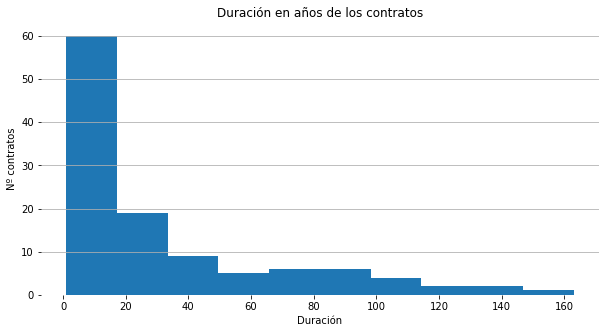

In [37]:
#Se dibuja el histograma
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,figsize=(10,5))
ax.hist(tiempo['file_name'])
ax.grid(True,axis='y')
ax.set_xlabel('Duración')
ax.set_ylabel('Nº contratos')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Duración en años de los contratos');

## Extra: Dataset: Emails fraudulentos

Tenemos un dataset con un conjunto de emails fraudulentos, es decir, usados para estafar. Los datos del correo están semi-estructurados, es decir, siguen el esquema de un formulario. Veámoslo:

In [38]:
from pathlib import Path
def load_dataset2(folder:str = "./data"):
    folder = Path(folder)
    with open(folder/"fradulent_emails.txt", "r", encoding = 'utf8', errors= "ignore") as f:
        emails = f.read()
    mail_iter = (("From r" + email).strip() for email in emails.split("From r") if len(email.strip())> 0)
    df = pd.Series(mail_iter, name = "raw_email").to_frame()
    return df

df_emails = load_dataset2()
df_emails.sample(5, random_state = 0)

,raw_email
1059,From r Fri Aug 13 01:23:39 2004\nReturn-Path:...
31,From r Mon Nov 25 12:01:22 2002\nReturn-Path:...
861,From r Sat May 29 07:36:31 2004\nReturn-Path:...
3141,From r Sat Oct 14 08:47:13 2006\nReturn-Path:...
1559,From r Mon Apr 4 08:48:24 2005\nReturn-Path:...


In [39]:
print(df_emails.raw_email[250])

From r  Tue Jun  3 08:22:16 2003
Return-Path: <mfrred@hknetmail.com>
	by fistfulofdollars.mr.itd.UM (3.6u) with ESMTP id h53CM6k24750
	for <R@M>; Tue, 3 Jun 2003 08:22:06 -0400 (EDT)
	for <acl-webmaster@cs.CU>; Tue, 3 Jun 2003 08:22:03 -0400 (EDT)
Message-Id: <200306031221.h53CLpkM017171@cs.CU>
From: "Fred Mbonu" <mfrred@hknetmail.com>
Reply-To: mfred@hknetmail.com
To: webmaster@aclweb.org
Date: Tue, 3 Jun 2003 13:22:36 -0700
Subject: DEAR PARTNER
X-Mailer: Microsoft Outlook Express 5.00.2919.6900 DM
MIME-Version: 1.0
Content-Type: text/plain; charset="us-ascii"
Content-Transfer-Encoding: quoted-printable
Status: O

DEAR PARTNER=2C

I GUESS THIS LETTER MAY COME TO YOU AS SURPRISE SINCE I
HAD NO PREVIOUS CORRESPONDENCE WITH YOU=2E I AM THE
CHAIRMAN TENDER BOARD OF INDEPENDENT NATIONAL ELECTORAL COMMISSION
=28INEC=29=2E I GOT YOUR CONTACT IN THE COURSE OF MY SEARCH
FOR A RELIABLE PERSON WITH WHOM TO HANDLE A VERY
CONFIDENTIAL TRANSACTION INVOLVING THE
TRANSFER OF THE SUM OF $30=2C000=2C0

### Tarea 1: Extracción del campo "From:"

Estamos interesados en extraer tanto el nombre como el email del campo "From:" de cada correo electrónico. Esto se puede implementar tanto usando regex como con métodos de strings de Python. 

En cada caso, puedes valorar cuál es la mejor opción, explicando el por qué de dicha decisión.

En caso de usar regex, es recomendable utilizar la flag `re.MULTILINE`, ya que sabemos que ese campo corresponde únicamente a una línea. Y así podemos utilizar los metacarcteres `^` y `$` para señalizar el inicio y el fin de la línea.

In [40]:
#Primero hacemos una copia del dataset original
df_emails_copy=df_emails.copy()

In [41]:
df_emails_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   raw_email  3977 non-null   object
dtypes: object(1)
memory usage: 31.2+ KB


* Vamos a utilizar una regex con la función str.extract que nos devolverá la información que se encuentra después de **"From:"**. Esta regex esta diseñada para que no recoja la información de **"From:"** que se observan en el cuerpo de algunos mails. 
* Finalmente los mail que no contienen ninguna dirección de email en el **"From:"**, por lo que se consideran anónimos y se marcan con el literal *'Correo fraudulento anonimo'.*

In [42]:
## ESCRIBE AQUÍ TU SOLUCIÓN
df_emails_copy['name_mail']=df_emails_copy['raw_email'].str.extract(r'From: \W?(\W?\w.*@\w.*\b\>?)',expand=False)
df_emails_copy['name_mail'].fillna('Correo fraudulento anonimo',inplace=True)

* Contabilizamos los correos marcados como anónimos

In [43]:
print('El número de correos anónimos es : ', len(df_emails_copy[df_emails_copy['name_mail']=='Correo fraudulento anonimo']))

El número de correos anónimos es :  381


Por último sacamos una muestra de que tipo de información se ha guardado en el campo name_mail, donde se ha volcado la información que contiene **"From:"**

In [44]:
#Sacamos una muestra del resultado
df_emails_copy.sample(10)

,raw_email,name_mail
2351,From r Sun Mar 19 05:44:58 2006\nReturn-Path:...,"Mr. Abudullah Mohamed"" <mustapha_mohan@yahoo.com>"
111,From r Wed Feb 12 11:18:00 2003\nReturn-Path:...,"MR.YARO BAMIYI"" <doomer@themail.com>"
2267,From r Tue Feb 28 16:00:24 2006\nReturn-Path:...,"SANDRA MENDES"" <sandra_1mendes@yahoo.co.nz>"
1737,From r Mon Jul 11 16:46:25 2005\nReturn-Path:...,"MUSA EYADEMA"" <musa_eyadema@yahoo.com>"
3254,From r Sun Nov 12 13:49:12 2006\nReturn-Path:...,Correo fraudulento anonimo
674,From r Sun Jan 25 22:40:09 2004\nReturn-Path:...,abu_saeed04@tiscali.co.uk
1973,From r Wed Nov 23 03:42:44 2005\nReturn-Path:...,Daniel Williams <daanwiiil@yahoo.com>
764,From r Thu Mar 18 14:42:56 2004\nReturn-Path:...,kamasutu <kamasutu@telstra.com>
1106,From r Mon Sep 6 15:02:59 2004\nReturn-Path:...,larryamu@handbag.com
3148,From r Mon Oct 16 08:45:08 2006\nReturn-Path:...,lucie issa <lucie_tn8882001@yahoo.co.jp>


### Tarea 2: Extracción del correo electrónico y dominio del emisor

Una vez hemos aislado el campo `From:` podemos extraer los correos electrónicos que aparecen en este. Lo más sencillo es utilizar regex en este caso, y el método `pd.Series.str.extract()`. Recuerda que para que `extract()` devuelva algo hay que definir un grupo de captura en el patrón con `()`

Ya que es difícil estar seguro de que lo estemos haciendo bien, hay que validar la expresión e iterar. Lo mejor es empezar con una expresión restrictiva, y ver los casos en los que no hemos extraído nada.

Algunas condiciones sobre el correo electrónico.

Sólo puede contener una `@`, que separa la parte local del dominio. `local@dominio`

La parte del dominio sólo puede contener letras latinas, dígitos, y guiones `-`. Así como puntos `.` para separar los subdominios. Además, el dominio tiene que terminaren una extensión de al menos dos letras.

La parte local tiene más libertad. Letras y dígitos. Vamos a aceptar sólamente los caracteres especiales `!#$%&*+-=?^_~` y puntos.

Por ejemplo, para la parte del dominio, como la abreviatura `\w` es equivalente a `[a-zA-Z0-9_]`, por lo tanto los caracteres disponibles son:

In [45]:
char_domain = r"[a-zA-Z0-9\-\.]"

Ahora, tenemos que construir la estrucuta completa del email, es decir, `local`+ `@`+ `dominio` + `.` + `extension`

In [46]:
### ESCRIBE AQUÍ TU SOLUCIÓN
# Eliminamos los correos anónimos por que al no tener información ene From: no tiene sentido procesar
# estos registros, por que no vamos a poder sacra ni el dominio ni el email.
df_emails_sin_anonimos= df_emails_copy.copy()
df_emails_sin_anonimos= df_emails_sin_anonimos[df_emails_sin_anonimos['name_mail']!='Correo fraudulento anonimo']


In [47]:
# Generamos la regex que nos va a extraer la dirección de email.
patron=r'([a-zA-Z0-9.!#$&*+\-=?^_~]+@+[a-zA-Z0-9\-\.]+\.[a-z]{2,3})'
df_emails_sin_anonimos['mail']=df_emails_sin_anonimos['name_mail'].str.extract(patron,expand=False)

# Generamos un nuevo regex que nos va a extraer el dominio de la direción de email previamente extraida
patron2=r'@([a-zA-Z0-9\-\.]+)\.[A-Za-z]{2,3}'
df_emails_sin_anonimos['domain_mail']=df_emails_sin_anonimos['mail'].str.extract(patron2,expand=False)

* Seguidamente pasamos a visualizar como ha quedado la información en las columnas mail donde se guarda la dirección de mail y domain_mail donde guardamos el dominio de las direcciones de correo detectadas

In [48]:
df_emails_sin_anonimos[['mail','domain_mail']]

,mail,domain_mail
0,james_ngola2002@maktoob.com,maktoob
1,bensul2004nng@spinfinder.com,spinfinder
2,obong_715@epatra.com,epatra
3,obong_715@epatra.com,epatra
4,m_abacha03@www.com,www
...,...,...
3971,tony_eselu2@virgilio.it,virgilio
3972,michealagu0255@zipmail.com.br,zipmail.com
3973,ali_sherif252@hotmail.fr,hotmail
3974,drusmanibrahimtg08@hotmail.fr,hotmail


* A continuación y para poder aportar más facilidad para poder conultar la información, creamos unos gráficos de barra, para poder sacar un ranking de los dominios más utilizados para la emisión de corrreos fraudulentos y de direcciones de correo más usadas.

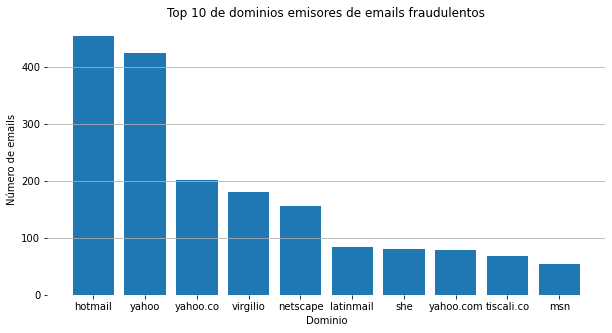

In [49]:
dominios=df_emails_sin_anonimos['domain_mail'].value_counts()
fig,ax=plt.subplots(1,figsize=(10,5))
ax.bar(dominios.index[:10],dominios[:10])
ax.grid(True,axis='y')
ax.set_ylabel('Número de emails')
ax.set_xlabel('Dominio')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Top 10 de dominios emisores de emails fraudulentos');

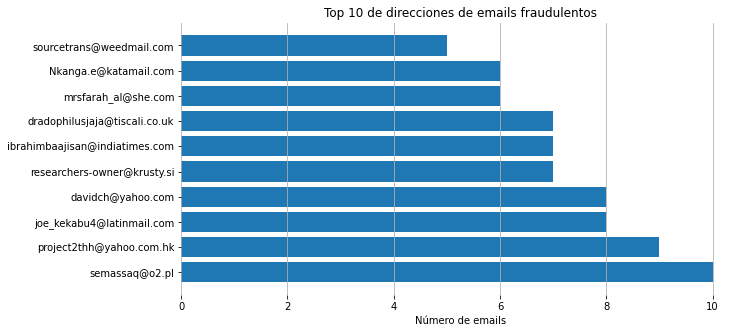

In [50]:
fig,ax=plt.subplots(1,figsize=(10,5))
emails=df_emails_sin_anonimos['mail'].value_counts()
ax.barh(emails.index[:10],emails[:10])
ax.grid(True,axis='x')
# ax.set_ylabel('Dirección de email')
ax.set_xlabel('Número de emails')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_title('Top 10 de direcciones de emails fraudulentos');

# References
* [Fraudulent E-mail Corpus CLAIR collection of "Nigerian" fraud emails](https://www.kaggle.com/rtatman/fraudulent-email-corpus)
* [NBER Macrohistory Database Western economic history data spanning 1785-1974](https://www.kaggle.com/sohier/nber-macrohistory-database/)